In [9]:
from tardis import run_tardis
import pandas as pd
import matplotlib.pyplot as plt
from tardis.io.config_reader import Configuration

In [2]:
!wget -q -nc https://github.com/tardis-sn/tardis-refdata/blob/master/unit_test_data.h5 

In [ ]:
conf = Configuration.from_yaml('../io/tests/data/tardis_configv1_verysimple.yml')

In [23]:
sim = run_tardis(conf, atom_data="kurucz_cd23_chianti_He_cmfgen_H_Si_I-II.h5")

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from ../../docs/kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:93)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:249)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:253)
[py.warnings         ][WARNING]  
	/home/atharva/workspace/code/tardis-main/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in true_divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)
[py.warnings         ][WARNING]  
	/home/atharva/workspace/code/tardis-main/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in true_divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)
[tardis.simulation.base][INFO   ]  
	
	Starting iteratio

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:   ', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 7.942e+42 erg / s
	Luminosity absorbed  = 2.659e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,9.93e+03,1.01e+04,0.4,0.507
5,9.85e+03,1.02e+04,0.211,0.197
10,9.78e+03,1.01e+04,0.143,0.117
15,9.71e+03,9.87e+03,0.105,0.0869


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 9933.952 K
	Expected t_inner for next iteration = 10703.212 K
 (base.py:542)
[py.warnings         ][WARNING]  
	/home/atharva/workspace/code/tardis-main/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in true_divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 2 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.071e+43 erg / s
	Luminosity absorbed  = 3.576e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.01e+04,1.08e+04,0.507,0.525
5,1.02e+04,1.1e+04,0.197,0.203
10,1.01e+04,1.08e+04,0.117,0.125
15,9.87e+03,1.05e+04,0.0869,0.0933


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10703.212 K
	Expected t_inner for next iteration = 10673.712 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 3 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.074e+43 erg / s
	Luminosity absorbed  = 3.391e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.08e+04,1.1e+04,0.525,0.483
5,1.1e+04,1.12e+04,0.203,0.189
10,1.08e+04,1.1e+04,0.125,0.118
15,1.05e+04,1.06e+04,0.0933,0.0895


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10673.712 K
	Expected t_inner for next iteration = 10635.953 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 4 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.058e+43 erg / s
	Luminosity absorbed  = 3.352e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.483,0.469
5,1.12e+04,1.12e+04,0.189,0.182
10,1.1e+04,1.1e+04,0.118,0.113
15,1.06e+04,1.07e+04,0.0895,0.0861


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10635.953 K
	Expected t_inner for next iteration = 10638.407 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 5 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.055e+43 erg / s
	Luminosity absorbed  = 3.399e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.469,0.479
5,1.12e+04,1.13e+04,0.182,0.178
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.07e+04,0.0861,0.0839


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.407 K
	Expected t_inner for next iteration = 10650.202 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 6 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.398e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.479,0.47
5,1.13e+04,1.12e+04,0.178,0.185
10,1.1e+04,1.11e+04,0.113,0.112
15,1.07e+04,1.07e+04,0.0839,0.0856


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10650.202 K
	Expected t_inner for next iteration = 10645.955 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 7 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.382e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.47,0.47
5,1.12e+04,1.13e+04,0.185,0.178
10,1.11e+04,1.11e+04,0.112,0.112
15,1.07e+04,1.07e+04,0.0856,0.086


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10645.955 K
	Expected t_inner for next iteration = 10642.050 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 8 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.350e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.47,0.472
5,1.13e+04,1.14e+04,0.178,0.175
10,1.11e+04,1.11e+04,0.112,0.111
15,1.07e+04,1.07e+04,0.086,0.084


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10642.050 K
	Expected t_inner for next iteration = 10636.106 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 9 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.052e+43 erg / s
	Luminosity absorbed  = 3.411e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 5/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.472,0.469
5,1.14e+04,1.15e+04,0.175,0.17
10,1.11e+04,1.11e+04,0.111,0.109
15,1.07e+04,1.08e+04,0.084,0.0822


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.106 K
	Expected t_inner for next iteration = 10654.313 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 10 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.070e+43 erg / s
	Luminosity absorbed  = 3.335e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.1e+04,0.469,0.475
5,1.15e+04,1.14e+04,0.17,0.177
10,1.11e+04,1.11e+04,0.109,0.112
15,1.08e+04,1.06e+04,0.0822,0.0878


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10654.313 K
	Expected t_inner for next iteration = 10628.190 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 11 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.363e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.475,0.472
5,1.14e+04,1.12e+04,0.177,0.184
10,1.11e+04,1.1e+04,0.112,0.114
15,1.06e+04,1.06e+04,0.0878,0.0859


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10628.190 K
	Expected t_inner for next iteration = 10644.054 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 12 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.420e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.472,0.467
5,1.12e+04,1.13e+04,0.184,0.176
10,1.1e+04,1.11e+04,0.114,0.11
15,1.06e+04,1.08e+04,0.0859,0.0821


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10644.054 K
	Expected t_inner for next iteration = 10653.543 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 13 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.406e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.467,0.466
5,1.13e+04,1.13e+04,0.176,0.18
10,1.11e+04,1.11e+04,0.11,0.111
15,1.08e+04,1.08e+04,0.0821,0.0841


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10653.543 K
	Expected t_inner for next iteration = 10647.277 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 14 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.063e+43 erg / s
	Luminosity absorbed  = 3.369e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.466,0.469
5,1.13e+04,1.13e+04,0.18,0.182
10,1.11e+04,1.1e+04,0.111,0.113
15,1.08e+04,1.07e+04,0.0841,0.0854


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10647.277 K
	Expected t_inner for next iteration = 10638.875 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 15 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.417e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.1e+04,0.469,0.484
5,1.13e+04,1.13e+04,0.182,0.181
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.07e+04,0.0854,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.875 K
	Expected t_inner for next iteration = 10655.125 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 16 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.059e+43 erg / s
	Luminosity absorbed  = 3.445e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.484,0.472
5,1.13e+04,1.13e+04,0.181,0.177
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.06e+04,0.0858,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.125 K
	Expected t_inner for next iteration = 10655.561 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 17 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.067e+43 erg / s
	Luminosity absorbed  = 3.372e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.472,0.468
5,1.13e+04,1.14e+04,0.177,0.175
10,1.1e+04,1.11e+04,0.113,0.11
15,1.06e+04,1.08e+04,0.0858,0.0816


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.561 K
	Expected t_inner for next iteration = 10636.536 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 18 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.057e+43 erg / s
	Luminosity absorbed  = 3.365e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.468,0.464
5,1.14e+04,1.13e+04,0.175,0.177
10,1.11e+04,1.1e+04,0.11,0.113
15,1.08e+04,1.07e+04,0.0816,0.0848


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.536 K
	Expected t_inner for next iteration = 10641.692 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 19 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.405e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:259)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:515)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.464,0.466
5,1.13e+04,1.13e+04,0.177,0.177
10,1.1e+04,1.11e+04,0.113,0.111
15,1.07e+04,1.07e+04,0.0848,0.0853


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10641.692 K
	Expected t_inner for next iteration = 10650.463 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 20 of 20 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.401e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 20 iterations 
	Simulation took 37.83 s
 (base.py:468)


In [ ]:
sim_hdf = pd.HDFStore("unit_test_data.h5")

In [33]:
spectrum_wav = sim_hdf['/test_runner_simple/spectrum/wavelength']
spectrum_lum = sim_hdf['/test_runner_simple/spectrum/luminosity_density_lambda']

(10000,) (10000,)


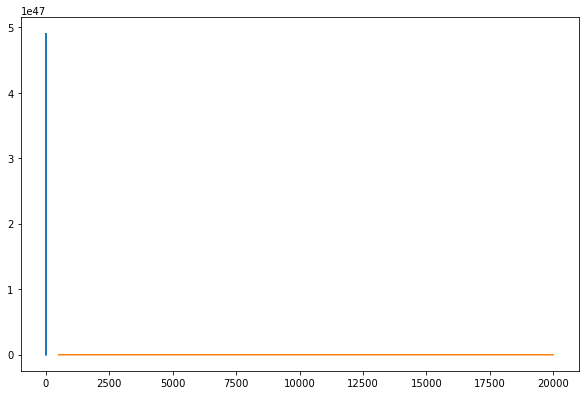

In [68]:
%matplotlib inline

plt.figure(figsize=(10, 6.5))
plt.plot(spectrum_wav, spectrum_lum, label="reference spectrum")
plt.plot(sim.runner.spectrum.wavelength.value, sim.runner.spectrum.luminosity_density_lambda.value, label="generated_spectrum")
plt.show()